In [1]:
from scipy.signal import butter, lfilter
from sklearn import preprocessing
import pandas as pd
from pathlib import Path
import pywt
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
sns.set_theme()
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

In [88]:
signal = list(range(1,10))

In [124]:
coeffs = pywt.wavedec(signal, 'db1', level=2)

In [98]:
cA2, cD1 = coeffs
print(f"cA2: {cA2}")
# print(f"cD2: {cD2}")
print(f"cD1: {cD1}")

cA2: [ 2.12132034  4.94974747  7.77817459 10.60660172 12.72792206]
cD1: [-0.70710678 -0.70710678 -0.70710678 -0.70710678  0.        ]


In [100]:
wavelet = pywt.Wavelet('db1')
dec_lo, dec_hi, rec_lo, rec_hi = wavelet.filter_bank

In [109]:
mcA[::2]

array([ 0.70710678,  3.53553391,  6.36396103,  9.19238816, 12.02081528])

In [110]:
mcA = np.convolve(signal, dec_lo)[::2]
mcD = np.convolve(signal, dec_hi)[::2]

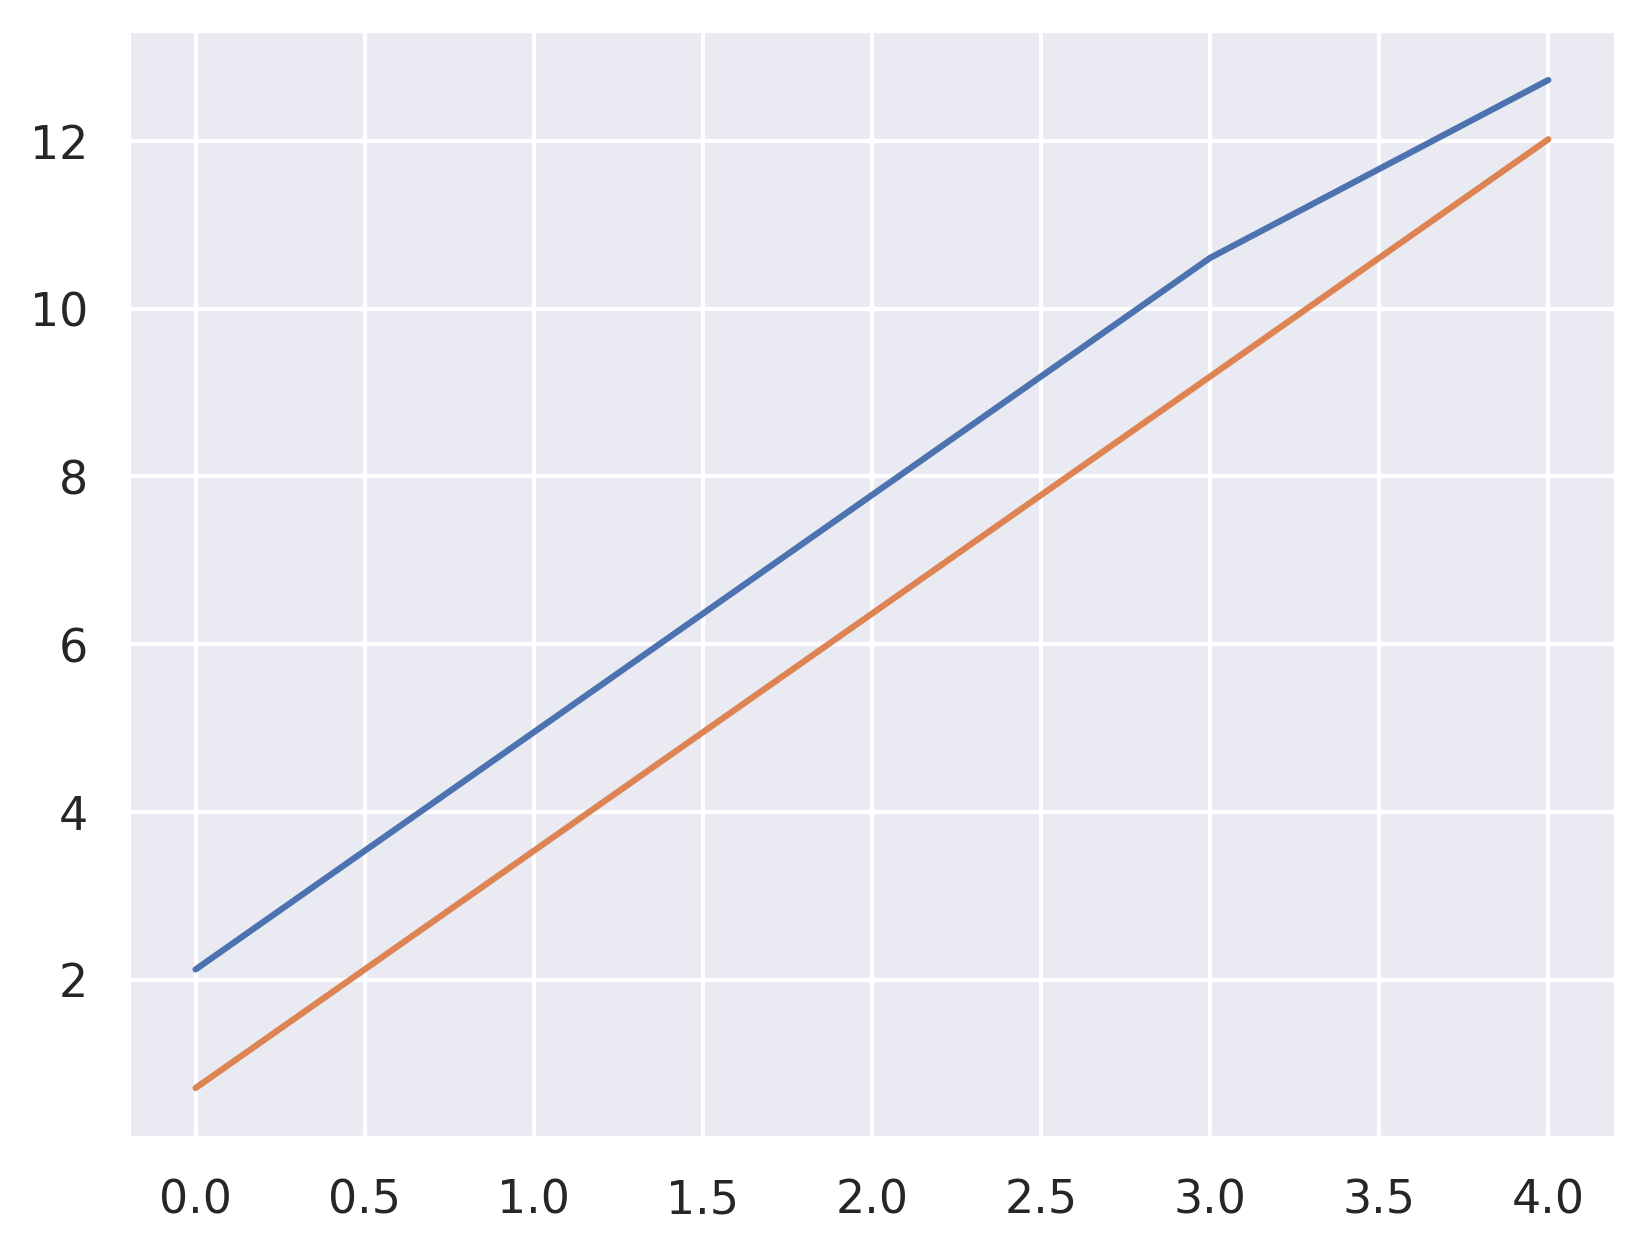

In [111]:
plt.plot(cA2)
plt.plot(mcA)

In [112]:
print(f"mcA: {mcA}")
print(f"mcD: {mcD}")

mcA: [ 0.70710678  3.53553391  6.36396103  9.19238816 12.02081528]
mcD: [-0.70710678 -0.70710678 -0.70710678 -0.70710678 -0.70710678]


In [113]:
mcD2 = np.convolve(mcA, dec_hi)[1::2]
mcA2 = np.convolve(mcA, dec_lo)[1::2]
print(f"mcD2: {mcD2}")
print(f"mcA: {mcA2}")

mcD2: [-2.  -2.   8.5]
mcA: [ 3.  11.   8.5]


In [143]:
def decompose(sgnl: np.array, levels: int, dec_high: np.array, dec_low: np.array) -> list:
    ca = np.convolve(sgnl, dec_lo)[1::2]
    cd = np.convolve(sgnl, dec_hi)[1::2]
    out = [cd]
    for i in range(levels-1):
        out.append(np.convolve(ca, dec_high)[1::2])
        ca = np.convolve(ca, dec_low)[1::2]
    return [ca] + list(reversed(out))

In [144]:
print(pywt.wavedec(signal, 'db1', level=2))
print(decompose(signal, levels=2, dec_high=dec_hi, dec_low=dec_lo))

[array([ 5., 13., 18.]), array([-2., -2.,  0.]), array([-0.70710678, -0.70710678, -0.70710678, -0.70710678,  0.        ])]
[array([ 5. , 13. ,  4.5]), array([-2. , -2. ,  4.5]), array([-0.70710678, -0.70710678, -0.70710678, -0.70710678,  6.36396103])]
